In [72]:
import pandas as pd

raw_path = "/content/Pal_AI/data/raw/health_indicators_btn.csv"

df = pd.read_csv(raw_path)
df.head()


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
0,#indicator+code,#indicator+name,#indicator+url,#date+year,#date+year+start,#date+year+end,#region+code,#region+name,#country+code,#country+name,#dimension+type,#dimension+code,#dimension+name,#indicator+value+num,#indicator+value,#indicator+value+low,#indicator+value+high
1,PHE_HHAIR_POP_CATEGORY_FUELS,Population with primary reliance on fuels and ...,https://www.who.int/data/gho/data/indicators/i...,2012,2012,2012,SEAR,South-East Asia,BTN,Bhutan,RESIDENCEAREATYPE,RESIDENCEAREATYPE_TOTL,Total,0.0,0 [0 - 0.03],0.0,0.032994834
2,W12_imports_dutyfree_A,Health warnings on cigarette packaging law app...,https://www.who.int/data/gho/data/indicators/i...,2022,2022,2022,SEAR,South-East Asia,BTN,Bhutan,NaN,NaN,NaN,NaN,No,NaN,NaN
3,WHOSIS_000001,Life expectancy at birth (years),https://www.who.int/data/gho/data/indicators/i...,2002,2002,2002,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_BTSX,Both sexes,67.84566543,67.8 [67.1-68.6],67.08312422,68.55874474
4,NCD_CHOL_MEANNONHDL_A,"Mean Non-HDL cholesterol, age-standardized",https://www.who.int/data/gho/data/indicators/i...,1991,1991,1991,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_FMLE,Female,3.0,3.0 [2.7-3.3],2.7,3.3


In [73]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19990 entries, 0 to 19989
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   GHO (CODE)         19990 non-null  object
 1   GHO (DISPLAY)      19990 non-null  object
 2   GHO (URL)          19990 non-null  object
 3   YEAR (DISPLAY)     19990 non-null  object
 4   STARTYEAR          19990 non-null  object
 5   ENDYEAR            19990 non-null  object
 6   REGION (CODE)      19990 non-null  object
 7   REGION (DISPLAY)   19990 non-null  object
 8   COUNTRY (CODE)     19990 non-null  object
 9   COUNTRY (DISPLAY)  19990 non-null  object
 10  DIMENSION (TYPE)   16778 non-null  object
 11  DIMENSION (CODE)   16778 non-null  object
 12  DIMENSION (NAME)   16759 non-null  object
 13  Numeric            17895 non-null  object
 14  Value              19915 non-null  object
 15  Low                12556 non-null  object
 16  High               12556 non-null  objec

In [74]:
df.describe(include='all')


,GHO (CODE),GHO (DISPLAY),GHO (URL),YEAR (DISPLAY),STARTYEAR,ENDYEAR,REGION (CODE),REGION (DISPLAY),COUNTRY (CODE),COUNTRY (DISPLAY),DIMENSION (TYPE),DIMENSION (CODE),DIMENSION (NAME),Numeric,Value,Low,High
count,19990,19990,19990,19990,19990,19990,19990,19990,19990,19990,16778,16778,16759,17895,19915,12556,12556
unique,632,632,560,71,71,71,2,2,2,2,41,316,305,11589,11340,8085,8774
top,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2010,2010,2010,SEAR,South-East Asia,BTN,Bhutan,SEX,SEX_BTSX,Both sexes,0.0,0,0.0,1.3
freq,990,990,990,1512,1511,1512,19989,19989,19989,19989,10869,4409,4409,1236,966,829,157


In [75]:
# check missing values
df.isna().sum()

,0
GHO (CODE),0
GHO (DISPLAY),0
GHO (URL),0
YEAR (DISPLAY),0
STARTYEAR,0
ENDYEAR,0
REGION (CODE),0
REGION (DISPLAY),0
COUNTRY (CODE),0
COUNTRY (DISPLAY),0


In [81]:
df.shape

(19990, 17)

In [92]:
# CLEANING CODE

import seaborn as sns

# Load the raw dataset from your folder
df = pd.read_csv("/content/Pal_AI/data/raw/health_indicators_btn.csv")

# 1. Rename columns to simpler names
df_clean = df.rename(columns={
    'GHO (CODE)': 'indicator_code',
    'GHO (DISPLAY)': 'indicator_name',
    'GHO (URL)': 'indicator_url',
    'YEAR (DISPLAY)': 'year',
    'REGION (DISPLAY)': 'region',
    'COUNTRY (DISPLAY)': 'country',
    'Numeric': 'numeric_raw',
    'Value': 'value',
})


# 2. Convert columns to correct data types
#errors='coerce' converts values that cant be numeric as NaN(Not a Numeric)
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')   # convert year to number
df_clean['value'] = pd.to_numeric(df_clean['value'], errors='coerce') # convert value to number

# numeric_raw may not be needed, but convert anyway
df_clean['numeric_raw'] = pd.to_numeric(df_clean['numeric_raw'], errors='coerce')

# 3. Drop rows with missing essential values
df_clean = df_clean.dropna(subset=['year', 'value'])

# We need year + value for analysis; drop rows where either missing

# 4. Drop irrelevant columns
# These columns exist but do not help analysis
columns_to_drop = [
    'STARTYEAR',        # not required
    'ENDYEAR',          # not required
    'REGION (CODE)',    # region code, not needed
    'COUNTRY (CODE)',   # numeric country code
    'DIMENSION (TYPE)', # WHO internal classification
    'DIMENSION (CODE)',
    'DIMENSION (NAME)',
    'Low',              # lower CI bound (not available for all)
    'High'              # upper CI bound (not available for all)
]

# Drop only if they exist in the dataset
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns], errors='ignore')

# -----------------------------------------------
# 5. Reset index after cleaning
# -----------------------------------------------
df_clean = df_clean.reset_index(drop=True)

# -----------------------------------------------
# 6. Save cleaned dataset to processed folder
# -----------------------------------------------
clean_path = "/content/Pal_AI/data/processed/cleaned_health.csv"
df_clean.to_csv(clean_path, index=False)

clean_path


'/content/Pal_AI/data/processed/cleaned_health.csv'

In [85]:
df_clean.shape

(5339, 8)

In [86]:
# Shows the datatype of each column and missing counts
print("\nDataset Info:")
print(df_clean.info())

# Show first few rows to understand structure
print("\nPreview of Data:")
df_clean.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5339 entries, 0 to 5338
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   indicator_code  5339 non-null   object 
 1   indicator_name  5339 non-null   object 
 2   indicator_url   5339 non-null   object 
 3   year            5339 non-null   float64
 4   region          5339 non-null   object 
 5   country         5339 non-null   object 
 6   numeric_raw     5275 non-null   float64
 7   value           5339 non-null   float64
dtypes: float64(3), object(5)
memory usage: 333.8+ KB
None

Preview of Data:


,indicator_code,indicator_name,indicator_url,year,region,country,numeric_raw,value
0,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2020.0,South-East Asia,Bhutan,0.43270,0.40
1,DEVICES04,Total density per 100 000 population: Provinci...,https://www.who.int/data/gho/data/indicators/i...,2010.0,South-East Asia,Bhutan,0.28000,0.28
2,SA_0000001400,"Alcohol, recorded per capita (15+) consumption...",https://www.who.int/data/gho/data/indicators/i...,1989.0,South-East Asia,Bhutan,0.31000,0.31
3,WSH_WATER_SAFELY_MANAGED,Population using safely managed drinking-water...,https://www.who.int/data/gho/data/indicators/i...,2003.0,South-East Asia,Bhutan,16.78378,17.00
4,TB_hivtest_pct,TB patients with known HIV status (%),https://www.who.int/data/gho/data/indicators/i...,2009.0,South-East Asia,Bhutan,12.00000,12.00


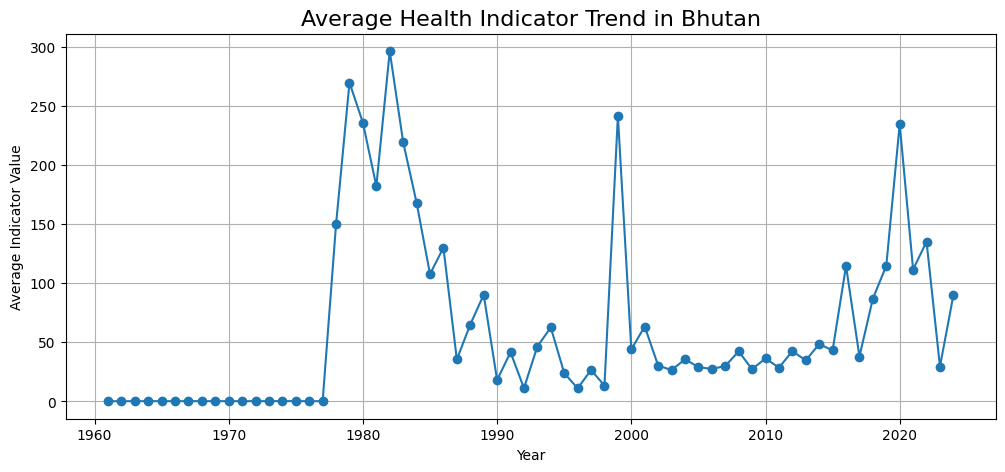

In [87]:
# Group dataset by year and calculate average health value
yearly_trend = df_clean.groupby("year")["value"].mean()

plt.figure(figsize=(12,5))
plt.plot(yearly_trend.index, yearly_trend.values, marker='o')
plt.title("Average Health Indicator Trend in Bhutan", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Average Indicator Value")
plt.grid(True)
plt.show()

# What this shows:
#-How health indicators in Bhutan change over time
#-If values improving or declining
#-Long-term patterns

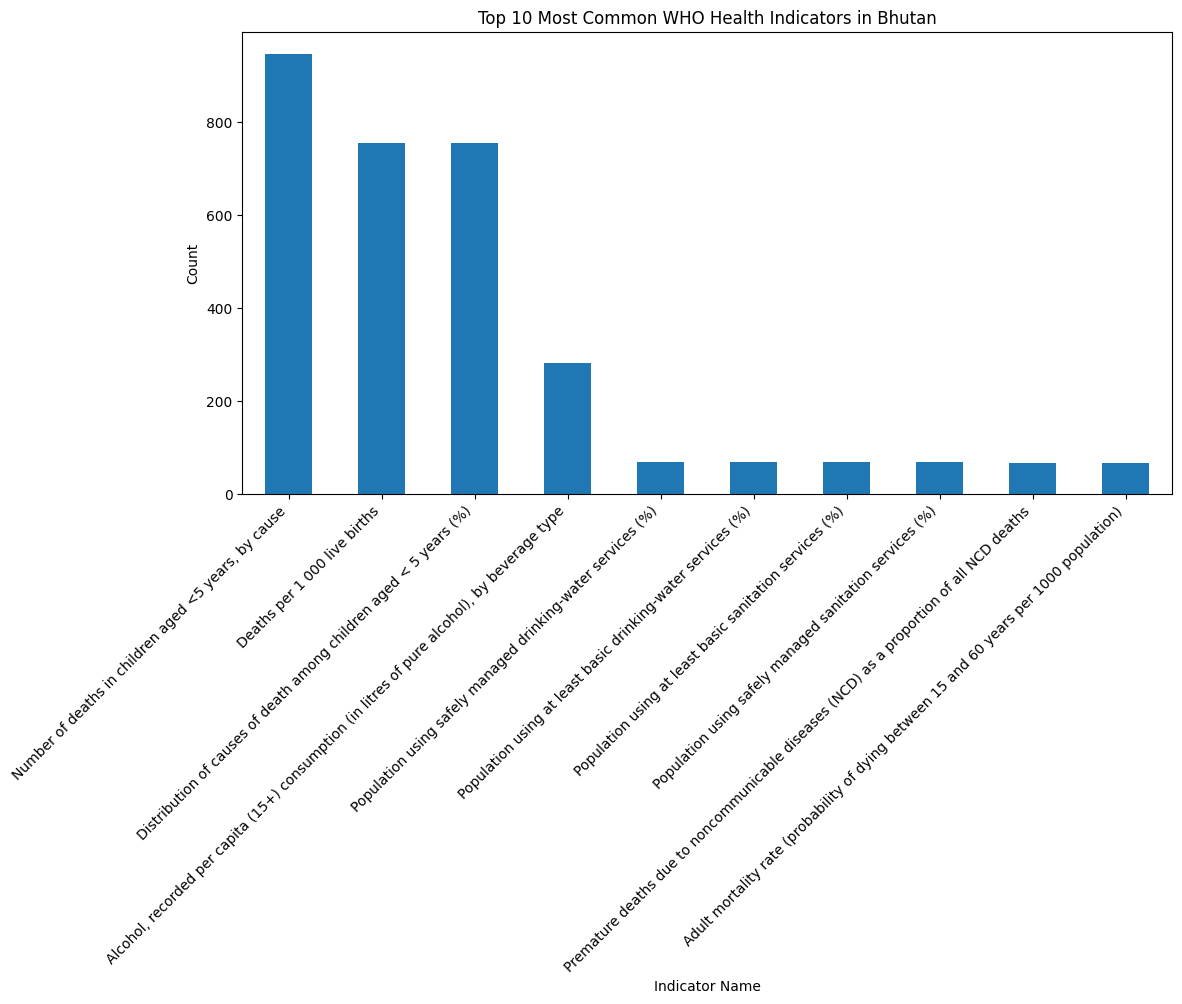

In [89]:
plt.figure(figsize=(12,6))
df_clean['indicator_name'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Common WHO Health Indicators in Bhutan")
plt.xlabel("Indicator Name")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()

#Shows which indicators are most frequently reported
#Good understanding of dataset composition

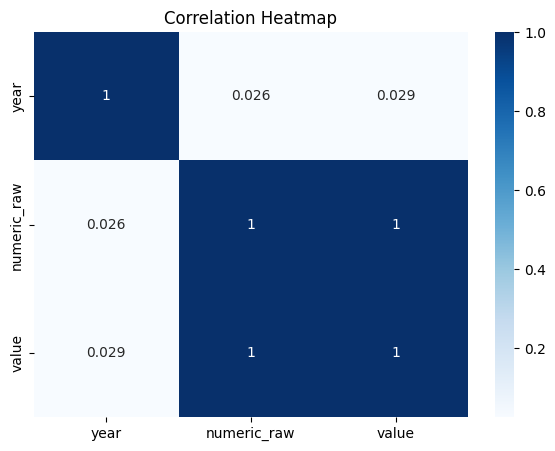

In [93]:
plt.figure(figsize=(7,5))
sns.heatmap(df_clean.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


In [94]:
# Find the most frequently recorded health indicator/ we can also see through the top 10 graph
most_common_indicator = df_clean['indicator_name'].value_counts().idxmax()

most_common_indicator


'Number of deaths in children aged <5 years, by cause'

In [95]:
# We will now Select the most common indicators and used that data to predict for our model

### **We will now Select the most common indicator and used that data to predict for our model.**

In [96]:
indicator = "Number of deaths in children aged <5 years, by cause"

df_indicator = df_clean[df_clean['indicator_name'] == indicator].copy()
df_indicator.head()


,indicator_code,indicator_name,indicator_url,year,region,country,numeric_raw,value
0,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2020.0,South-East Asia,Bhutan,0.432700,0.4
13,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2012.0,South-East Asia,Bhutan,0.000000,0.0
24,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2000.0,South-East Asia,Bhutan,20.770420,20.8
26,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2001.0,South-East Asia,Bhutan,19.219190,19.2
27,MORT_100,"Number of deaths in children aged <5 years, by...",https://www.who.int/data/gho/data/indicators/i...,2005.0,South-East Asia,Bhutan,8.596157,9.0


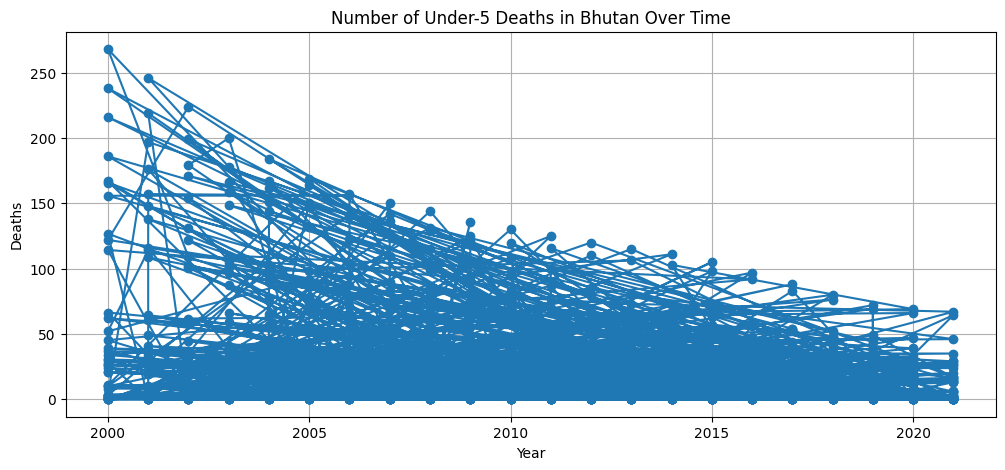

In [97]:
plt.figure(figsize=(12,5))
plt.plot(df_indicator['year'], df_indicator['value'], marker='o')
plt.title("Number of Under-5 Deaths in Bhutan Over Time")
plt.xlabel("Year")
plt.ylabel("Deaths")
plt.grid(True)
plt.show()


In [98]:
df_indicator['year'].value_counts().sort_index()


,count
year,
2000.0,43
2001.0,43
2002.0,43
2003.0,43
2004.0,43
2005.0,43
2006.0,43
2007.0,43
2008.0,43


In [99]:
# Aggregate total under-5 deaths per year
df_yearly = df_indicator.groupby("year")["value"].sum().reset_index()

df_yearly


,year,value
0,2000.0,2359.9
1,2001.0,2191.8
2,2002.0,2054.1
3,2003.0,1850.2
4,2004.0,1743.1
5,2005.0,1668.9
6,2006.0,1548.6
7,2007.0,1457.9
8,2008.0,1360.9
9,2009.0,1265.6


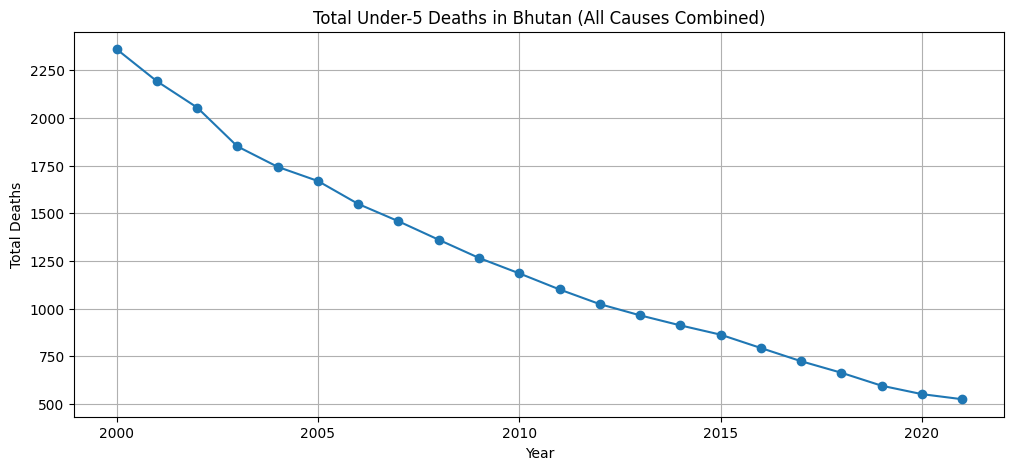

In [100]:
plt.figure(figsize=(12,5))
plt.plot(df_yearly['year'], df_yearly['value'], marker='o')
plt.title("Total Under-5 Deaths in Bhutan (All Causes Combined)")
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.grid(True)
plt.show()


In [102]:
# Work on a copy of df_yearly
df_fe = df_yearly.copy()

# -----------------------------------------------------
# 1. Scale the year (important for some ML models)
# -----------------------------------------------------
# Example: (2020 - 2000) / (2021 - 2000) gives values between 0 and 1
df_fe["year_scaled"] = (df_fe["year"] - df_fe["year"].min()) / (df_fe["year"].max() - df_fe["year"].min())

# -----------------------------------------------------
# 2. Create a lag feature (deaths last year)
# -----------------------------------------------------
df_fe["lag_1"] = df_fe["value"].shift(1)

# -----------------------------------------------------
# 3. Create a 3-year moving average (smooth trend)
# -----------------------------------------------------
df_fe["ma_3"] = df_fe["value"].rolling(window=3).mean()

# -----------------------------------------------------
# 4. Percent change year-to-year
# -----------------------------------------------------
df_fe["pct_change"] = df_fe["value"].pct_change()

# -----------------------------------------------------
# 5. Remove the first rows with NaN (caused by lag & MA)
# -----------------------------------------------------
df_fe = df_fe.dropna()

# Show final engineered dataset
df_fe


,year,value,year_scaled,lag_1,ma_3,pct_change
2,2002.0,2054.1,0.095238,2191.8,2201.933333,-0.062825
3,2003.0,1850.2,0.142857,2054.1,2032.033333,-0.099265
4,2004.0,1743.1,0.190476,1850.2,1882.466667,-0.057886
5,2005.0,1668.9,0.238095,1743.1,1754.066667,-0.042568
6,2006.0,1548.6,0.285714,1668.9,1653.533333,-0.072083
7,2007.0,1457.9,0.333333,1548.6,1558.466667,-0.058569
8,2008.0,1360.9,0.380952,1457.9,1455.800000,-0.066534
9,2009.0,1265.6,0.428571,1360.9,1361.466667,-0.070027
10,2010.0,1184.7,0.476190,1265.6,1270.400000,-0.063922
11,2011.0,1100.5,0.523810,1184.7,1183.600000,-0.071073


# **TRAINING ML MODEL USING UPDATED DATASET**

In [103]:
# Step 14: Machine Learning Model(1st Try)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Use the feature-engineered dataset
df_model = df_fe.copy()

# --------------------------------------------
# 1. Define input features (X) and target (y)
# --------------------------------------------
# These columns help predict future values
X = df_model[["year_scaled", "lag_1", "ma_3", "pct_change"]]

# Target variable: total deaths in under-5 children
y = df_model["value"]

# --------------------------------------------
# 2. Split into training and testing sets
# --------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------
# 3. Train the Random Forest regression model
# --------------------------------------------
model = RandomForestRegressor(
    n_estimators=200,       # number of trees
    random_state=42
)

model.fit(X_train, y_train)

# --------------------------------------------
# 4. Evaluate model accuracy
# --------------------------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MSE:", mse)
print("R² Score:", r2)

# --------------------------------------------
# 5. Save the trained model for Streamlit
# --------------------------------------------
model_path = "/content/Pal_AI/models/under5_model.pkl"
joblib.dump(model, model_path)

model_path


Model Performance:
MSE: 51159.176162125215
R² Score: 0.8795321057672687


'/content/Pal_AI/models/under5_model.pkl'

In [106]:
# Future Prediction code(1st Try)
import numpy as np
import pandas as pd
import joblib

# Load model
model = joblib.load("/content/Pal_AI/models/under5_model.pkl")

# Work from your feature engineered data
df_temp = df_fe.copy()

# List of years we want to forecast
future_years = [2025, 2030, 2035, 2040]

predictions = []

for year in future_years:

    # 1. Compute scaled year
    year_scaled = (year - df_temp["year"].min()) / (df_temp["year"].max() - df_temp["year"].min())

    # 2. Previous year's value (lag)
    lag_1 = df_temp["value"].iloc[-1]

    # 3. Moving average of last 3 values
    ma_3 = df_temp["value"].tail(3).mean()

    # 4. Percent change from last known year
    pct_change = df_temp["value"].pct_change().iloc[-1]

    # Build input row
    X_future = pd.DataFrame([{
        "year_scaled": year_scaled,
        "lag_1": lag_1,
        "ma_3": ma_3,
        "pct_change": pct_change
    }])

    # Predict
    y_pred = model.predict(X_future)[0]

    # Store results
    predictions.append((year, y_pred))

    # Add predicted year into df_temp for recursive forecasting
    new_row = pd.DataFrame({"year": [year], "value": [y_pred]})
    df_temp = pd.concat([df_temp, new_row], ignore_index=True)

predictions


[(2025, np.float64(575.038999999999)),
 (2030, np.float64(577.4419999999991)),
 (2035, np.float64(577.4419999999991)),
 (2040, np.float64(577.4419999999991))]

In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Use only the year trend as the feature
X = df_fe[["year_scaled"]]
y = df_fe["value"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2:", r2_score(y_test, y_pred))

# Save model
model_path = "/content/Pal_AI/models/under5_linear.pkl"
joblib.dump(model, model_path)

model_path


MSE: 17991.234494020355
R^2: 0.9576348507397099


'/content/Pal_AI/models/under5_linear.pkl'

[(2025, np.float64(118.5722317027678)),
 (2030, np.float64(-280.6776234433162)),
 (2035, np.float64(-679.9274785894006)),
 (2040, np.float64(-1079.1773337354846))]

In [111]:
import joblib
import pandas as pd

# Load the trained model
model = joblib.load("/content/Pal_AI/models/under5_linear.pkl")

# Future years to forecast
future_years = [2025, 2030, 2035, 2040]
preds = []

min_year = df_fe["year"].min()
max_year = df_fe["year"].max()

for year in future_years:
    # Scale the year (same way as training)
    year_scaled = (year - min_year) / (max_year - min_year)

    # Keep same column name as training
    X_future = pd.DataFrame({"year_scaled": [year_scaled]})

    # Raw prediction from model
    raw_pred = model.predict(X_future)[0]

    # Clip negative values (because deaths cannot go below 0)
    pred = max(raw_pred, 0)

    # Store (year, original predicted value, clipped value)
    preds.append((year, raw_pred, pred))

preds


[(2025, np.float64(118.5722317027678), np.float64(118.5722317027678)),
 (2030, np.float64(-280.6776234433162), 0),
 (2035, np.float64(-679.9274785894006), 0),
 (2040, np.float64(-1079.1773337354846), 0)]

# **BUILDING STREAMLIT APP**

In [112]:
%%writefile /content/Pal_AI/app/streamlit_app.py
"""
Streamlit app for Bhutan Under-5 Mortality Forecasting

This app:
- Loads cleaned WHO data for Bhutan
- Focuses on one indicator: "Number of deaths in children aged <5 years, by cause"
- Aggregates total deaths per year
- Loads a pre-trained LinearRegression model (under5_linear.pkl)
- Lets user select a year and see predicted total under-5 deaths
"""

import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load data and model
# -----------------------------

@st.cache_data
def load_data():
    """Load the cleaned WHO Bhutan dataset and prepare yearly under-5 deaths."""
    # Load cleaned data
    df = pd.read_csv("/content/Pal_AI/data/processed/cleaned_health.csv")

    # Focus only on our chosen indicator
    indicator = "Number of deaths in children aged <5 years, by cause"
    df_indicator = df[df["indicator_name"] == indicator].copy()

    # Aggregate: sum across all causes for each year
    df_yearly = df_indicator.groupby("year")["value"].sum().reset_index()

    # Ensure year is numeric and sorted
    df_yearly["year"] = pd.to_numeric(df_yearly["year"], errors="coerce")
    df_yearly = df_yearly.dropna(subset=["year", "value"])
    df_yearly = df_yearly.sort_values("year")

    return df_yearly

@st.cache_resource
def load_model():
    """Load the trained Linear Regression model for under-5 deaths."""
    model = joblib.load("/content/Pal_AI/models/under5_linear.pkl")
    return model

# Load data and model
df_yearly = load_data()
model = load_model()

# Pre-compute min and max year for scaling and UI
min_year = int(df_yearly["year"].min())
max_year = int(df_yearly["year"].max())

# -----------------------------
# 2. Streamlit page layout
# -----------------------------

st.title("Bhutan Under-5 Mortality Forecasting Dashboard")
st.write(
    """
This dashboard uses WHO data for Bhutan to analyze and forecast
the **total number of deaths in children under 5 years of age**
(across all causes combined).

The model is a simple Linear Regression trained on historical data
from around 2000–2021, so forecasts far into the future should be
treated as *illustrative only*, not as official statistics.
"""
)

# Show raw data preview
st.subheader("1. Historical Under-5 Deaths (Aggregated by Year)")
st.dataframe(df_yearly.head())

# -----------------------------
# 3. Historical trend plot
# -----------------------------

st.subheader("2. Trend of Total Under-5 Deaths in Bhutan")

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_yearly["year"], df_yearly["value"], marker="o")
ax.set_title("Total Under-5 Deaths in Bhutan (All Causes Combined)")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Deaths")
ax.grid(True)

st.pyplot(fig)

# -----------------------------
# 4. Forecasting widget
# -----------------------------

st.subheader("3. Forecast Future Under-5 Deaths")

st.write(
    f"""
The model was trained on data from **{min_year}** to **{max_year}**.
You can choose a year within this range to see the actual value,
or choose a future year to see the model's prediction.
"""
)

# Year selection slider (allow some future years)
selected_year = st.slider(
    "Select a year to forecast:",
    min_value=min_year,
    max_value=max_year + 20,   # allow forecasting up to ~20 years beyond last data
    value=max_year + 5,
    step=1
)

# Function to compute model prediction for any year
def predict_deaths(year: int) -> float:
    """Predict total under-5 deaths for a given year, clipped at zero."""
    # Scale the year same way as in training
    year_scaled = (year - min_year) / (max_year - min_year)

    # Create a DataFrame with correct feature name
    X_future = pd.DataFrame({"year_scaled": [year_scaled]})

    # Raw model prediction
    raw_pred = model.predict(X_future)[0]

    # Clip at 0 because number of deaths cannot be negative
    clipped_pred = max(raw_pred, 0)

    return raw_pred, clipped_pred

# Check if selected year is in historical data
historical_row = df_yearly[df_yearly["year"] == selected_year]

if not historical_row.empty:
    # If year exists in historical data, show actual value
    actual_value = float(historical_row["value"].values[0])
    st.markdown(f"### 📘 Year {selected_year}: Actual total under-5 deaths = **{int(actual_value)}**")
else:
    # If future year, use the model for prediction
    raw_pred, clipped_pred = predict_deaths(selected_year)
    st.markdown(f"### 🔮 Year {selected_year}: Predicted total under-5 deaths = **{clipped_pred:,.2f}**")
    st.caption(
        f"(Raw model output: {raw_pred:,.2f}. "
        "Values below 0 are clipped to 0 because deaths cannot be negative.)"
    )

# -----------------------------
# 5. Plot with forecast point
# -----------------------------

st.subheader("4. Historical Data with Forecast Point")

fig2, ax2 = plt.subplots(figsize=(8, 4))
ax2.plot(df_yearly["year"], df_yearly["value"], marker="o", label="Historical")

if selected_year > max_year:
    # Add forecast point to the chart
    _, clipped_pred = predict_deaths(selected_year)
    ax2.scatter([selected_year], [clipped_pred], color="red", label="Forecast", zorder=5)
    ax2.axvline(x=selected_year, color="red", linestyle="--", alpha=0.5)

ax2.set_xlabel("Year")
ax2.set_ylabel("Number of Deaths")
ax2.set_title("Under-5 Deaths with Forecast")
ax2.grid(True)
ax2.legend()

st.pyplot(fig2)

st.write("---")
st.caption(
    "This app is a teaching/demo tool for healthcare data science in Bhutan. "
    "Model predictions are illustrative and should not be used as official health statistics."
)


Writing /content/Pal_AI/app/streamlit_app.py


In [114]:
# If your project is actually here:
%cd /content/Pal_AI


/content/MentalHealthAI/healthcare-bhutan
